## Finding Heavy Traffic Indicators on I-94

### Bussiness Understanding

In this project, we are  going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). 

The aim of our investigation is to identify a few indicators of heavy traffic on I-94. These indicators can include weather, time of day, weekday, and so on. For example, we may discover that traffic is typically heavier in the summer or when it snows.

### Data Understanding

The available data is only from westbound traffic in the proximity of that station located approximately midway between Minneapolis and Saint Paul. Traffic volume represents the hourly number of westbound cars on I-94

Every row traffic and weather condition for a spececific hour, containing data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

 The dataset has 48204 rows and 9 columns
Data dictionary:

holiday US National holidays plus regional holiday, Minnesota State Fair

temp Average temp in kelvin

rain_1h Amount in mm of rain that occurred in the hour

snow_1h Amount in mm of snow that occurred in the hour

clouds_all Percentage of cloud cover

weather_main Short textual description of the current weather

weather_description Longer textual description of the current weather

date_time Hour of the data collected in local CST time

traffic_volume Hourly I-94 ATR 301 reported westbound traffic volume



### The I-94 Traffic Dataset

In [3]:
import pandas as pd 
traffic_I94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
#display first five rows
traffic_I94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
#display last five rows
traffic_I94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic_I94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
traffic_I94.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [8]:
traffic_I94.shape

(48204, 9)

In this dataset, there are a total of  9 columns and 48204 rows. None of the rows have null values with a mixture of  float, integer and object data types. The `date_time` column shows that the record starts from  2012-10-02 09:00:00 and 2018-09-30 23:00:00.


The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## CHECK MISSING VALUE; DUPLICATED ROWS.

In [9]:
#your code here#
traffic_I94.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [10]:
traffic_I94.duplicated().sum()

np.int64(17)

Conclusion:  All of them with no missing values, right data type and no problems for working with original column labels. No data cleaning necesary at this stage.

### Analyzing Traffic Volume

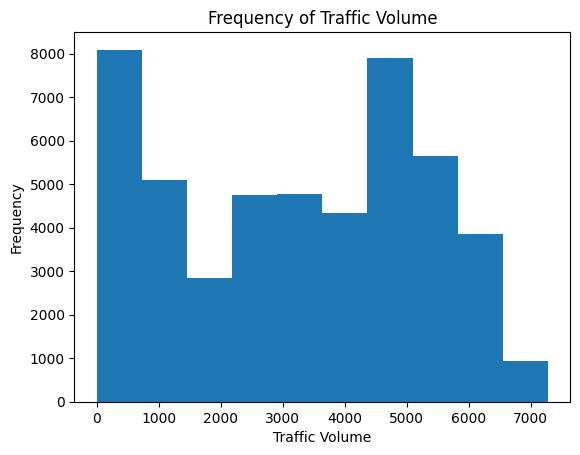

In [11]:
#run the following code
import matplotlib.pyplot as plt
%matplotlib inline

#plot a histogram using a Pandas method
traffic_I94['traffic_volume'].plot.hist()
plt.title('Frequency of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()
# cthe mix giữa 2 kiểu phân phối khác nhau

In [12]:
#create a summary of statistics of traffic_volume column
traffic_I94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Conclusion: 
From 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic varies from 0 to 7280 cars per hour, having average 3260 cars
As you can see, there are two peak: from 0 => 800 and around 4500 to 5000 vehicles per hour and lower at center
As we can see in the histogram, there are 2 peaks where the frequency gets almost the same value, meaning that there could be a time variable explanation, contemplating that there could be a correlation for traffic_volume and day time, considering that there could be less action at night and more action at day in the same date.

###  Traffic Volume: Day vs. Night

Here, we divided the dataset into two parts:

Daytime data: hours from 7 AM to 7 PM (12 hours)

Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [13]:
traffic_I94['date_time'] = pd.to_datetime(traffic_I94['date_time'])
traffic_I94['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [14]:
#day_time = pd.date_range('2012-10-02 06:00:00', '2018-09-30 19:00:00', freq = '1h')

day_time = traffic_I94.copy()[(traffic_I94['date_time'].dt.hour >= 7) & (traffic_I94['date_time'].dt.hour <19) ]
day_time

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [15]:
night_time = traffic_I94.copy()[(traffic_I94['date_time'].dt.hour < 7) |(traffic_I94['date_time'].dt.hour >= 19) ]
night_time


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,NaN,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,NaN,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,NaN,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,NaN,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,NaN,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


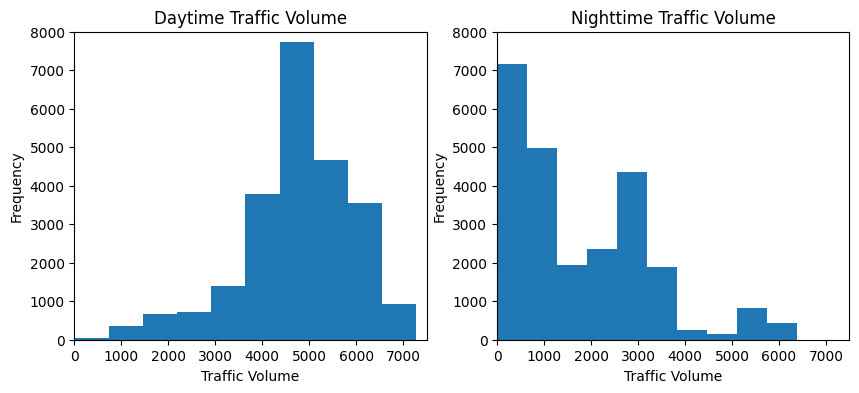

In [16]:
#plot a histogram using a Pandas method

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(day_time['traffic_volume'])
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'])
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [17]:
pd.merge(day_time['traffic_volume'].describe(), night_time['traffic_volume'].describe(),
         left_index=True, right_index=True, suffixes=('_day', '_night'))

,traffic_volume_day,traffic_volume_night
count,23877.000000,24327.000000
mean,4762.047452,1785.377441
std,1174.546482,1441.951197
min,0.000000,0.000000
25%,4252.000000,530.000000
50%,4820.000000,1287.000000
75%,5559.000000,2819.000000
max,7280.000000,6386.000000


The daytime histogram is leftskewed, Most of the values pile up on the right side of the histogram and the median is higher than the mean.
The nighttime histogram is rightskewed, Most of the values pile up on the left side of the histogram and the mean is higher than the median.

Traffic at night is light compared to the daytime when you look at the averages and our goal is to find the indicators of heavy traffic, so we will be using the daytime data going forward.

### Time Indicators

In [18]:
#create new column for traffic volume measured each month
day_time['month'] = traffic_I94['date_time'].dt.month
#get average traffic volume for each month
by_month = day_time.groupby('month')['traffic_volume'].mean().reset_index()
by_month.columns = ['month','traffic_volume']
by_month


,month,traffic_volume
0,1,4495.613727
1,2,4711.198394
2,3,4889.409560
3,4,4906.894305
4,5,4911.121609
5,6,4898.019566
6,7,4595.035744
7,8,4928.302035
8,9,4870.783145
9,10,4921.234922


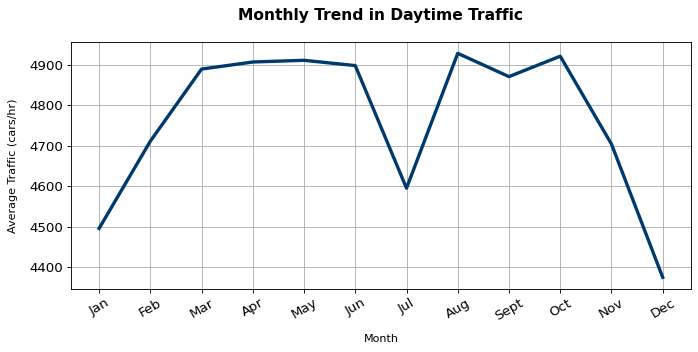

In [19]:
#plot a line graph showing monthly traffic volume averages
def create_line(df, x_val, y_val, label_x, label_y, title, line_color='#003a6d', xtype=None, x_limit=None, y_limit=None, ticks_x=None):
    plt.plot(df[x_val], df[y_val], color=line_color, linewidth=3)
    plt.xlabel(label_x, labelpad=10)
    plt.ylabel(label_y, labelpad=10)
    plt.title(title, fontweight='bold', fontsize=14, pad=20, loc='center')
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if xtype:
        if xtype.lower()=='month':
            plt.xticks(range(1,13), rotation=30,
                       labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                               'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
        
        elif xtype.lower()=='day_of_week':
            plt.xticks(range(0,7), rotation=30,
                       labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

        elif xtype.lower()=='day_hour':
            plt.xticks(range(7,19))
            
        elif xtype.lower()=='other':
            plt.xticks(ticks_x)
    
    plt.grid()
plt.figure(figsize=(10,4), dpi=80)
create_line(df=by_month, x_val='month', y_val='traffic_volume',
            label_x='Month', label_y='Average Traffic (cars/hr)',
            title='Monthly Trend in Daytime Traffic', xtype='month')

plt.show()

Conclusion: 
 The average traffic volume osilates between 4000 and 5000 cars per month, reaching high peak in Aug and Oct then March, Apr, May, July
 We can see that the avg traffic volume decrease gradually from oct to Dec and Jan, Feb
 => This means that people usually commue in the warm weather 
 => We can see that in July, the average traffic volume is the lowest and decrease significantly => Let's find deeply in July

In [20]:
only_july = day_time[day_time['month'] == 7]
only_july

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
7350,NaN,289.15,0.0,0.0,75,Clouds,broken clouds,2013-07-01 07:00:00,6783,7
7351,NaN,291.59,0.0,0.0,1,Clear,sky is clear,2013-07-01 08:00:00,5742,7
7352,NaN,294.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 09:00:00,4764,7
7353,NaN,295.60,0.0,0.0,1,Clear,sky is clear,2013-07-01 10:00:00,4669,7
7354,NaN,297.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 11:00:00,4863,7
...,...,...,...,...,...,...,...,...,...,...
46313,NaN,301.29,0.0,0.0,20,Clouds,few clouds,2018-07-31 14:00:00,4922,7
46314,NaN,301.43,0.0,0.0,40,Clouds,scattered clouds,2018-07-31 15:00:00,5722,7
46315,NaN,302.00,0.0,0.0,40,Clouds,scattered clouds,2018-07-31 16:00:00,6357,7
46316,NaN,302.29,0.0,0.0,20,Clouds,few clouds,2018-07-31 17:00:00,5912,7


In [21]:
# Extract years from date_time and assign to new column 'year'
day_time['year'] = day_time['date_time'].dt.year

# Extract only the month of july
only_july = day_time[day_time['month'] == 7]

# the average traffic volume in month of july
by_july = only_july.groupby('year').traffic_volume.mean().reset_index()
by_july

,year,traffic_volume
0,2013,4914.354054
1,2014,4871.598240
2,2015,4613.146226
3,2016,3924.923645
4,2017,4734.120301
5,2018,4586.899543


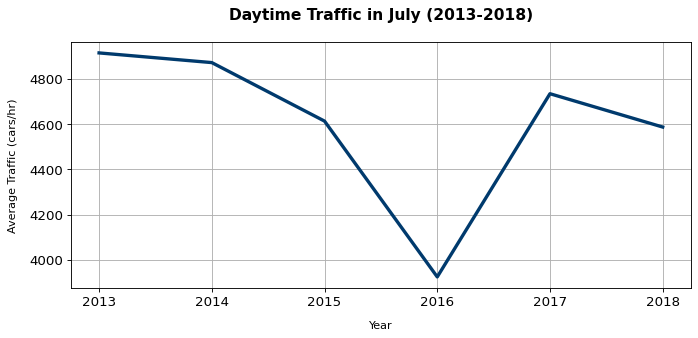

In [22]:
plt.figure(figsize=(10,4), dpi=80)
create_line(df=by_july, x_val='year', y_val='traffic_volume',
            label_x='Year', label_y='Average Traffic (cars/hr)',
            title='Daytime Traffic in July (2013-2018)')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4492\2538951126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2016['day'] = year_2016['date_time'].dt.day


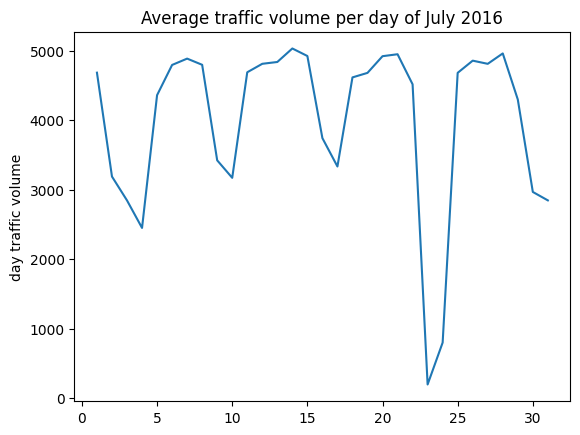

In [23]:
#Taking a closer look into 2016
year_2016 = day_time[day_time['year'] == 2016]
year_2016['day'] = year_2016['date_time'].dt.day
event_filter = (year_2016['month'] == 7)
july_2016 = year_2016.loc[event_filter]
daily = july_2016.groupby('day')['traffic_volume'].mean()
plt.plot(daily)
plt.ylabel('day traffic volume')
plt.title('Average traffic volume per day of July 2016')
plt.show()

The average traffic volume decrase from 23- 24

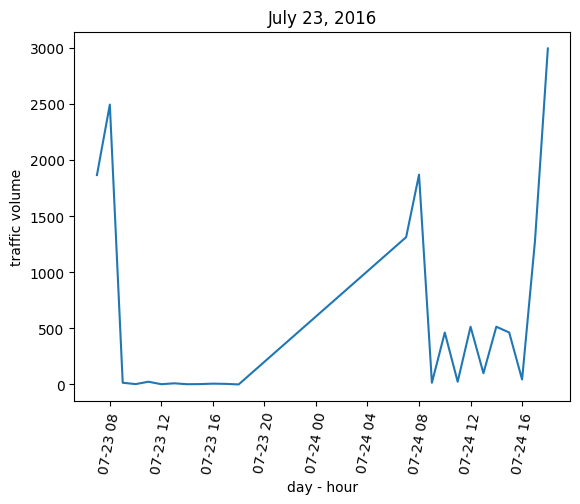

In [24]:
#Checking rows with data from 23 and 24 of July, 2016
day_time['day'] = day_time['date_time'].dt.day

slicing = (((day_time['day'] == 23) | (day_time['day'] == 24)) & (day_time['month'] == 7) & (day_time['year'] == 2016))
day_23 = day_time[slicing]

plt.plot(day_23['date_time'], day_23['traffic_volume'])
plt.xlabel('day - hour')
plt.ylabel('traffic volume')
plt.xticks(rotation=80)
plt.title('July 23, 2016')
plt.show()

Please comment on the graph!!

IN this data, from nearly 8 hours to 18h the data are records = 0
Maybe traffic was interrupted for road construction, an accident or other reasons.
This project is aimed to determine some heavy traffic indicators, therefor a Bias like this in our data won't affect our goal.
Lets wrap up this section with a seasonal comparation:



### Time Indicators (II)

In [25]:
#create new column for traffic volume measured daily
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek

#get average traffic volume for each day
by_dayofweek = day_time.groupby('dayofweek').traffic_volume.mean().reset_index()
by_dayofweek

,dayofweek,traffic_volume
0,0,4893.551286
1,1,5189.004782
2,2,5284.454282
3,3,5311.303730
4,4,5291.600829
5,5,3927.249558
6,6,3436.541789


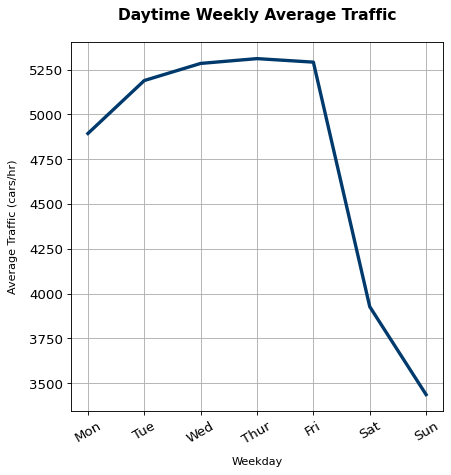

In [26]:
#plot a line graph showing daily traffic volume averages
##your code here##
plt.figure(figsize=(6,6), dpi=80)
create_line(df=by_dayofweek, x_val='dayofweek', y_val='traffic_volume',
            xtype='day_of_week', label_x='Weekday', label_y='Average Traffic (cars/hr)',
            title='Daytime Weekly Average Traffic')

plt.show()

Clear difference between bussiness days and weekends, being bussier in the former with over 5000 cars per hour compared with less than 3750 cars per hours in the weekend.

Please comment on the graph!!

### Time Indicators (III)

In [27]:
day_time['hour'] = day_time['date_time'].dt.hour
#split the data based on the day type: weekdays; weekend.
business_days = day_time.copy()[day_time['dayofweek'] <= 4]
weekdays = day_time.copy()[day_time['dayofweek'] >= 5]
business_days

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,day,dayofweek,hour
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,2,1,9
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,2,1,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,2,1,11
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,2,1,12
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,2,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48143,NaN,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,9,2018,28,4,14
48144,NaN,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,9,2018,28,4,15
48145,NaN,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,9,2018,28,4,16
48146,NaN,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,9,2018,28,4,17


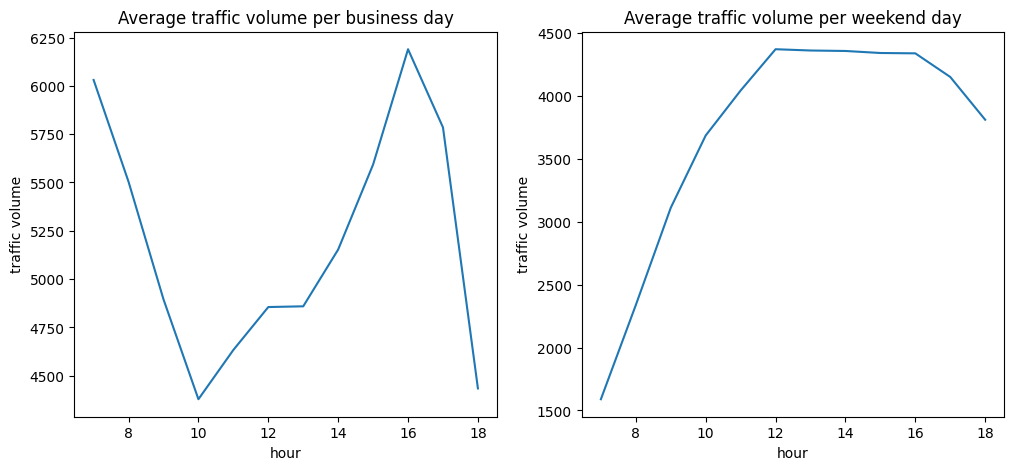

In [33]:
#Creating new hour column
day_time['hour'] = day_time['date_time'].dt.hour

#Splitting business days and weekend days
week = day_time.loc[day_time['dayofweek'] < 5]
weekend = day_time.loc[day_time['dayofweek'] >= 5]

#Plooting bussiness days and weekend days seperately
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(week.groupby('hour')['traffic_volume'].mean())
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.title('Average traffic volume per business day')

plt.subplot(1, 2, 2)
plt.plot(weekend.groupby('hour')['traffic_volume'].mean())
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.title('Average traffic volume per weekend day')
plt.show()

COMMENT ON THE GRAPH

On business days, we see that most traffic occurs between 3 and 5 pm and from 6am to 7am
on. On weekends, there is a wider range of peak values corresponding to 12 pm to 4 pm. The weekend values (as we noted earlier) are much smaller than business day values.

GENERAL COMMENT:
+ Overall, the avrage traffic volume in day time is busier than night time
+ From Monday to Friday ( business day), the busiest traffic hours for business day is in the morning (6-8) and evening between 3 and 6 pm. However, in weekday,the busiest traffic hours is from 11pm-16pm
+ After 7 pm the traffic drops to quieter with less than 3500 cars per hour.

### Weather Indicators

In [41]:
#find correlation 
day_time[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000


Temperature shows the strongest correlation with a value of +0.128.

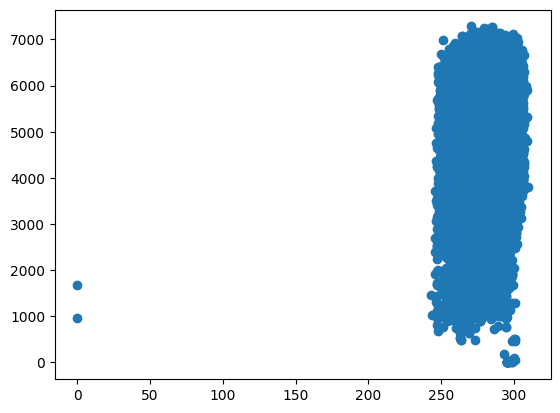

In [42]:
#plot a scatter plot

plt.scatter(day_time['temp'], day_time['traffic_volume'])
plt.show()

In [43]:
num_cols = traffic_I94.columns
num_cols

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

We can conclude that temperature does not look like a solid indicator of heavy traffic.

### Weather Types

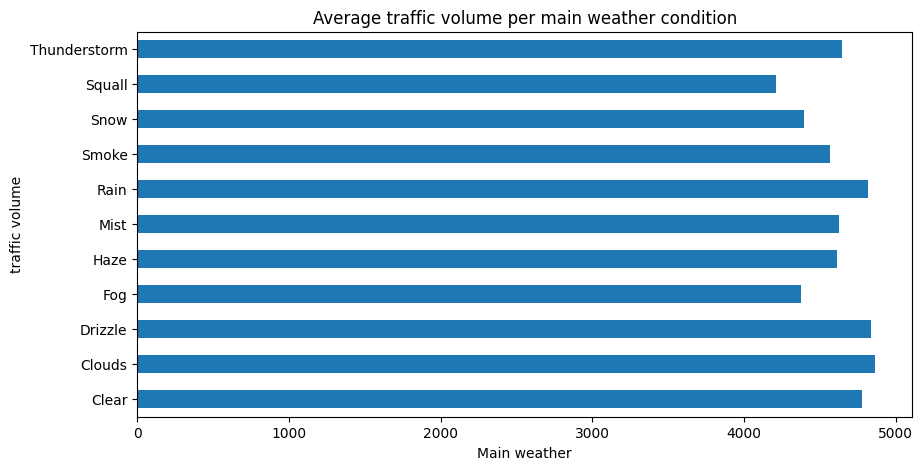

In [47]:
weather = day_time.groupby('weather_main')['traffic_volume'].mean()

weather.plot.barh(figsize=(10,5))
plt.xlabel('Main weather')
plt.ylabel('traffic volume')
plt.title('Average traffic volume per main weather condition')
plt.show()

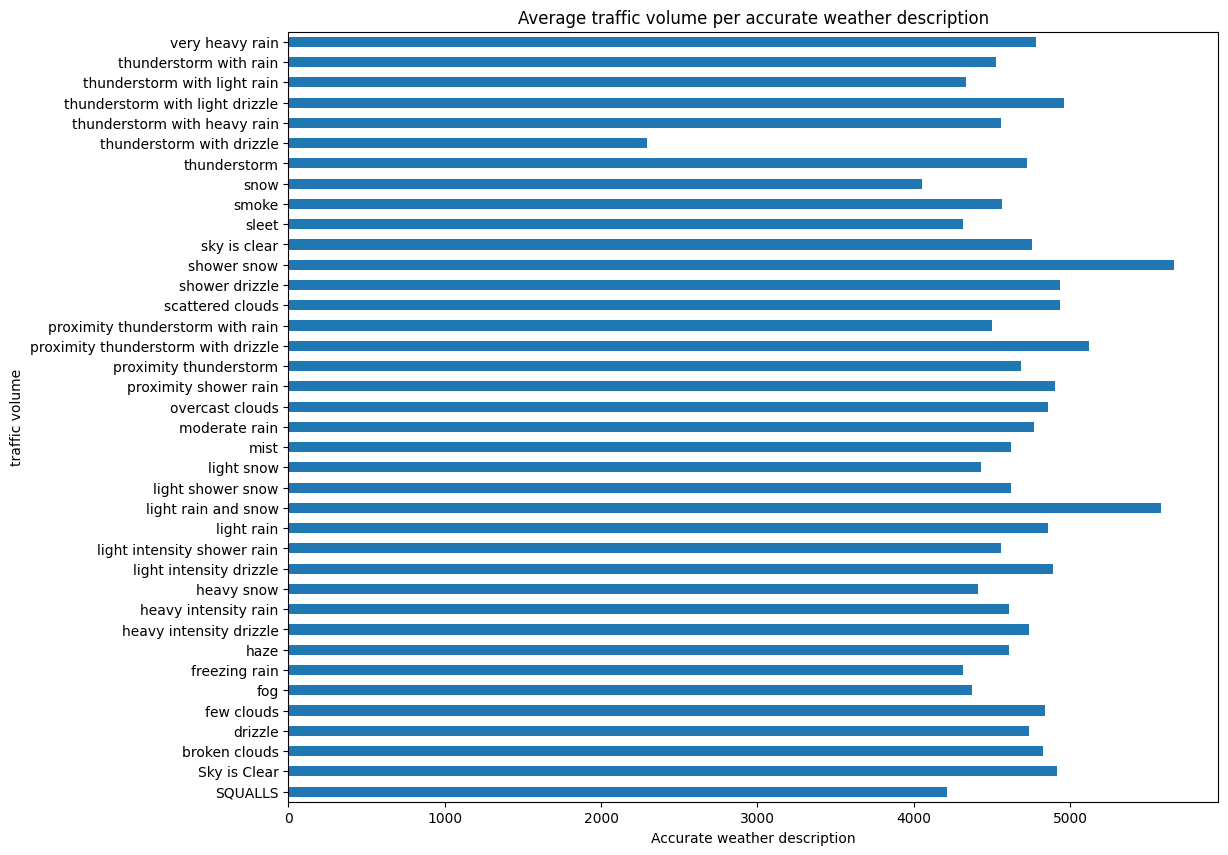

In [49]:
#calculate the average traffic volume based on the weather description.
description = day_time.groupby('weather_description')['traffic_volume'].mean()

description.plot.barh(figsize=(12,10))
plt.xlabel('Accurate weather description')
plt.ylabel('traffic volume')
plt.title('Average traffic volume per accurate weather description')
plt.show()

COMMENT ON THE GRAPH

There isn't much variance for the different main weather conditions

There seem to be a sligh spike on accurate weather descriptions like "light rain and snow" and "shower and drize"

Possible explanation for this behaviour is that people could possible have taken their cars to work on bad weather days instead of biking or walking, although there are other more extreme days were people didn't seem to have the same behaviour. Not much to explain here.

### Conclusion

After analyzing the data, only datetime data affects the traffic volume on I-94 Interstate highway between 2012 and 2018. Weather conditions doesn't seem to play a roll in heavy traffic volume. The indicators found in this dataset are:

Traffic is heavier in rush hour at morning from 6am to 8amand evenings from 3pm to 6pm.

Traffic is heavier in week days than in weekends

Traffic is heavier in Autumn and Spring rather than Summer and Winter

No strong correlation between temperature and traffic volume

No much variance between different weather conditions